In [1]:
import numpy as np
import graph_tool.all as gt
from mesoprofiles.calculate import calculate_mesoprofile
from mesoprofiles.generate import generate_network


(ipykernel_launcher.py:13187): Gtk-WARNING **: 16:09:51.183: Locale not supported by C library.
	Using the fallback 'C' locale.


Example of the methods implemented in the `mesoprofiles` package, which is based on the work in 

Betzel, Richard F., John D. Medaglia, and Danielle S. Bassett. "Diversity of meso-scale architecture in human and non-human connectomes." Nature communications 9.1 (2018): 346.

# Mesoscale profiles

The `calculate_mesoprofile` method returns an array with the distribution of roles taken on by the nodes in the network, according to the partition that is passed to the method. Note that the partition can be either passed in the form of a graph tool BlockState OR by passing both the graph `g` (as a graph tool graph object) AND the partition`b` (either as a np array or as a graph tool vertex propety).

The elements of the array represent the following roles, in order: 

`['assortative block', 'core block', 'periphery block', 'disassortative block', 'other']`

E.g. when the function returns `[1., 0., 0., 0., 0.]`, this means that 100% of nodes in the network are in blocks that function as assortative blocks in relationship to all other blocks. 

We include a helper function to create synthetic example networks with block structure `generate_networks`. 

In [4]:
g = generate_network(N=200, B=2, mu=0.05, mean_degree=10, mesotype='communities',
                     equal_block_sizes=True)
state = gt.minimize_blockmodel_dl(g)

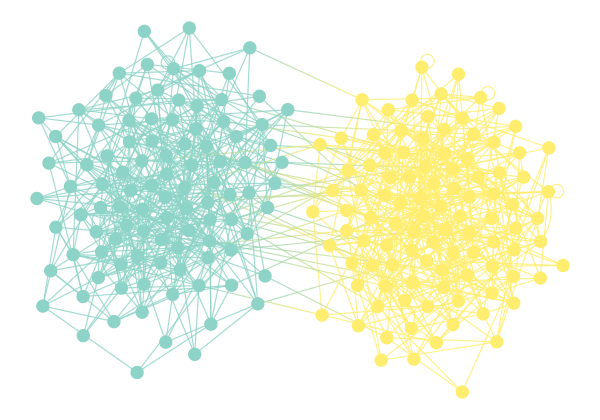

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x178cd3100, at 0x178cd28f0>

In [5]:
state.draw(output_size=(300, 300))

In [6]:
calculate_mesoprofile(state=state, g=None, b=None)

array([1., 0., 0., 0., 0.])

Let's look at a core-periphery example, this time we pass `g` and `b` instead of `state`:

In [7]:
g = generate_network(N=200, B=2, mu=0.05, mean_degree=10, mesotype='cp',
                     equal_block_sizes=True)

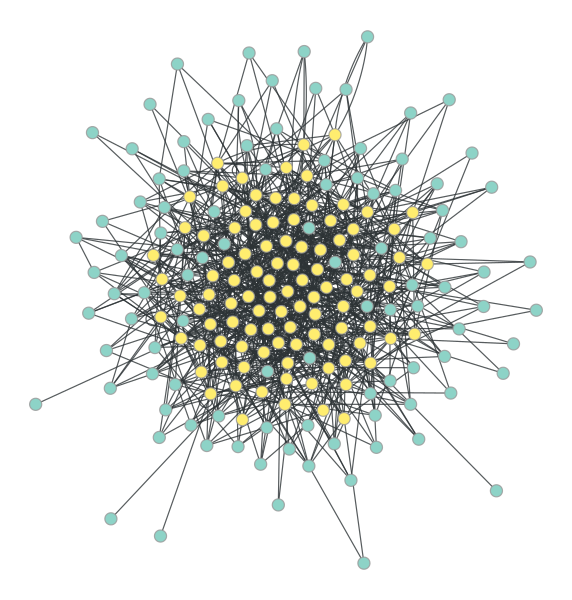

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x178cd13c0, at 0x178cd1d50>

In [8]:
gt.graph_draw(g, vertex_fill_color=g.vp.blocklabel, output_size=(300, 300))

In [9]:
calculate_mesoprofile(state=None, g=g, b=g.vp.blocklabel)

array([0. , 0.5, 0.5, 0. , 0. ])

To see what happens when core and periphery are NOT the same size, let's force this in the example network:

In [11]:
g = generate_network(N=200, B=2, mu=0.05, mean_degree=10, mesotype='cp',
                     sizes=[0.2, 0.8], equal_block_sizes=False)

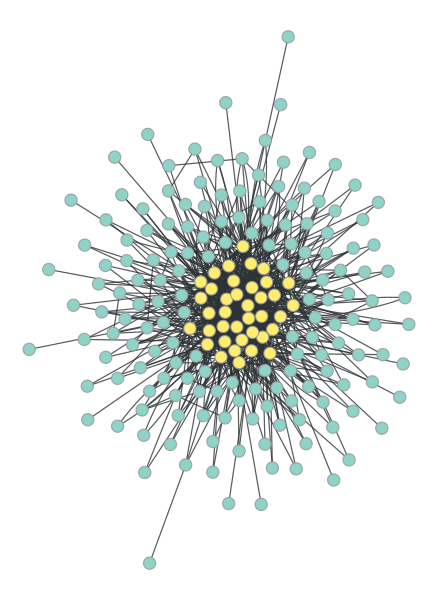

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17e41ac20, at 0x17e1f1a80>

In [13]:
gt.graph_draw(g, vertex_fill_color=g.vp.blocklabel, output_size=(300, 300))

In [12]:
calculate_mesoprofile(state=None, g=g, b=g.vp.blocklabel)

array([0.       , 0.1928934, 0.8071066, 0.       , 0.       ])

We can see that the mesoprofile vector has been weighted now according to the relative sizes of the core and periphery.